## Time Series Forecasting - Model Selection

In [14]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [7]:
#get data, catfish sale
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

/tmp/ipykernel_66589/3790822639.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [8]:
#check stationarity, the data is stationary!
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


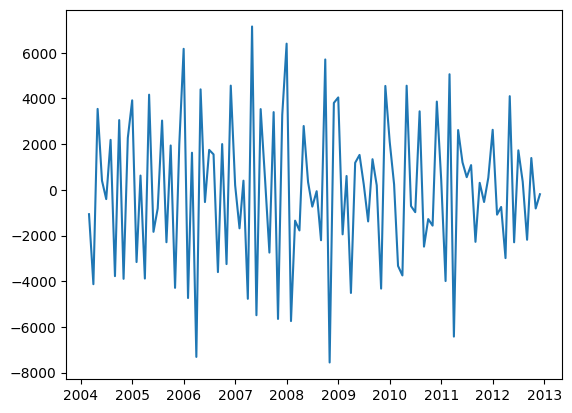

In [9]:
plt.plot(series)

/home/alexis/.local/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


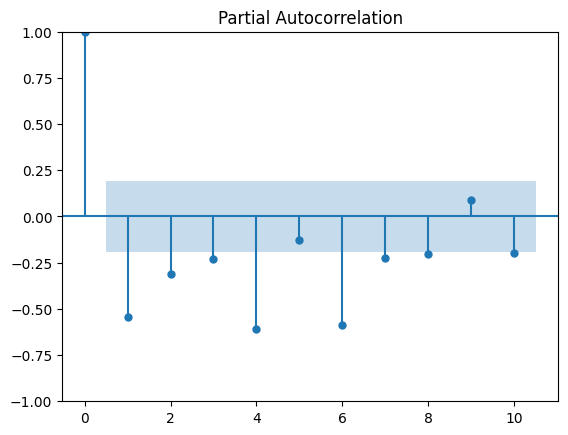

In [10]:
plot_pacf(series, lags=10)
plt.show()

# Either AR(1), AR(4), AR(6), or AR(10)

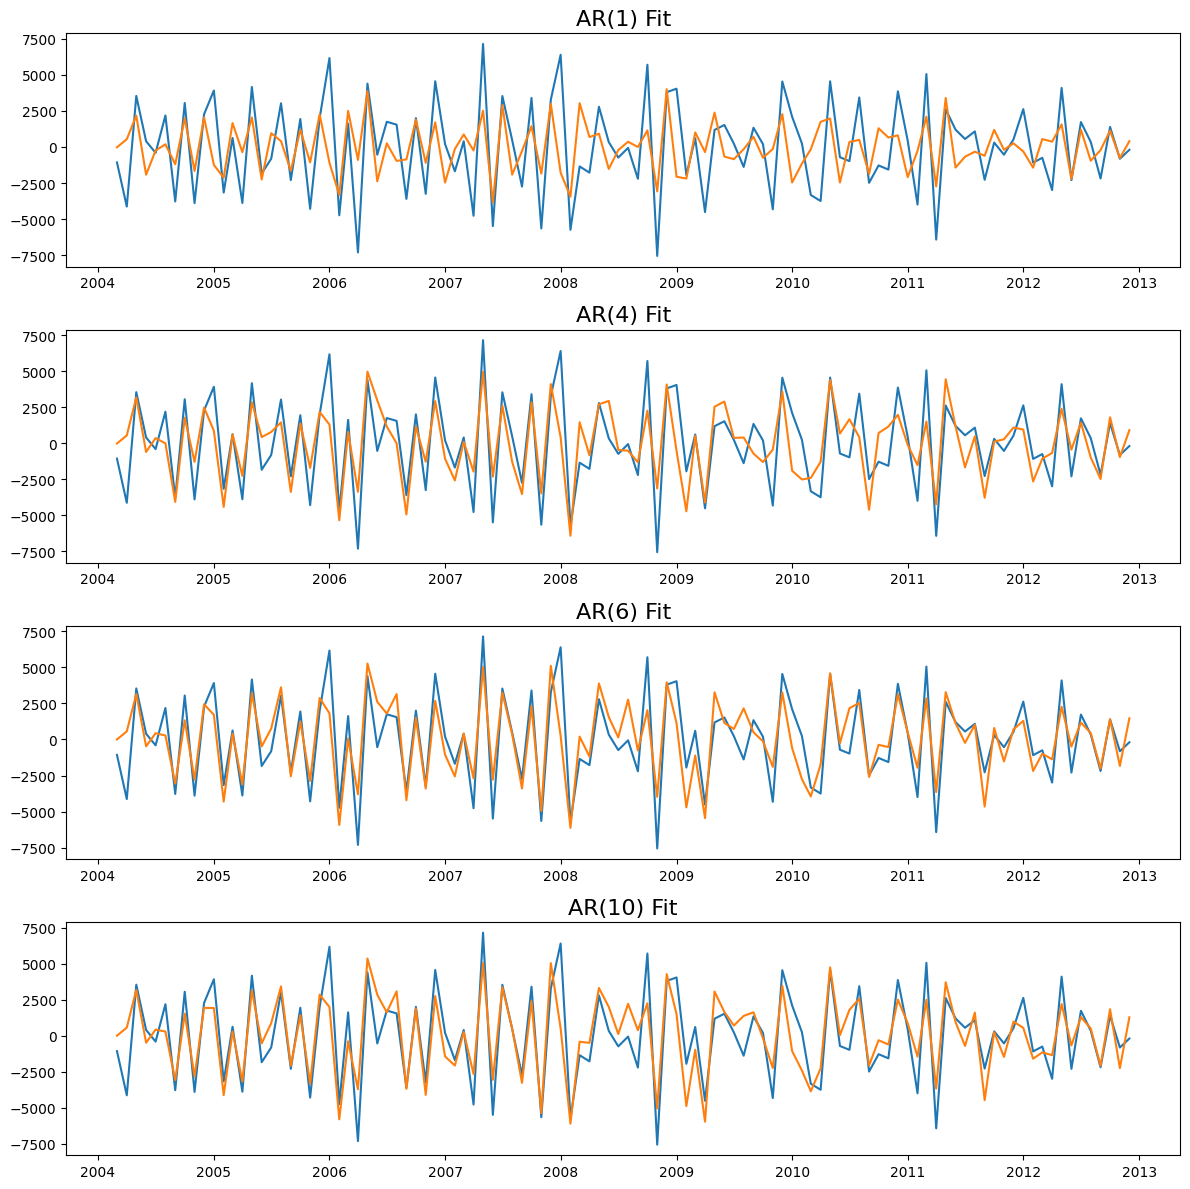

In [17]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

Each model has: 

A log likelihood ($l$)\
A number of parameters ($k$)\
A number of samples used for fitting ($n$)

# AIC = 2 $k$ - 2 $l$

Lower AIC via higher log likelihood or less parameters

# BIC = $\ln(n)k$ - 2 $l$

Lower BIC via higher log likelihood or less parameters or less samples used in fitting

In [18]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.6099852660386
AIC for AR(6): 1899.6497441237098
AIC for AR(10): 1902.3765450210433


## Based on AIC criteria, pick AR(6)

In [19]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.590619830711
BIC for AR(6): 1920.9572568766064
BIC for AR(10): 1934.337814150388


## Based on BIC criteria, pick AR(6)